# Exercies day 06, b
Bootstrap

In [65]:
import numpy as np
import matplotlib.pyplot as plt


## Ex01

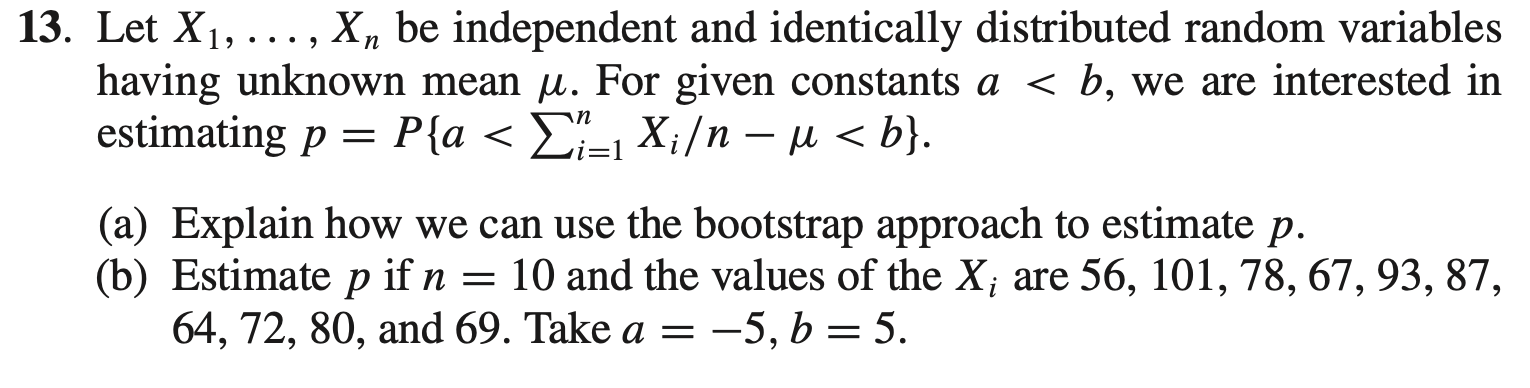

### a) 
From the given samples $X_1,...,X_n$ you can find the Empirical distribution, and assume that this approximates the true distribution. In practive this is simple sampling from a given dataset with replacement $r$ times. For each of these simulated datasets we find the mean, and the vector we end up with is the bootstrap replicates and from this the variance is calculated. 


In [66]:
def bootstrap(xi : list[float], r : int = 100, estimate_param : str = 'mean', seed : int = 42) -> np.ndarray[float]:
    """
        Returns the variance of the bootstrap mean of the given sample.
        
        :param xi: The sample.
        :param r: The number of bootstrap samples.
        :estimate_param: The parameter to estimate. Either 'mean' or 'variance'.
        :param seed: The seed for the random number generator.
        
        :return: the list of bootstrap replicates.
    """
    estimate_param = estimate_param.lower()
    
    assert estimate_param in ['mean', 'variance', 'median'], "estimate_param must be either 'mean', 'variance' or 'median'"
    
    np.random.seed(seed)
    
    n = len(xi)
    
    all_samples = np.random.choice(xi, size=(n, r), replace=True)
    
    bootstrap_replicates = None # <-- not necessary but we fancy like that
    
    if estimate_param == 'mean':
        bootstrap_replicates = all_samples.mean(axis=0)
        
    elif estimate_param == 'variance':
        bootstrap_replicates = all_samples.var(axis=0)
    
    elif estimate_param == 'median':
        bootstrap_replicates = np.median(all_samples, axis=0)
    
    
    return bootstrap_replicates

### b)


In [67]:
n = 10
X_i = np.array([56, 101, 78, 67, 93, 87, 64, 72, 80, 69])
a = -5
b = 5
        
bootstrap_replicate = bootstrap(X_i, estimate_param='mean')

mu_est = bootstrap_replicate.mean()
estimate = bootstrap_replicate - mu_est
prob = np.logical_and(a < estimate, estimate < b)

print(f"probability estimate = {prob.mean()}")

probability estimate = 0.73


## Ex02

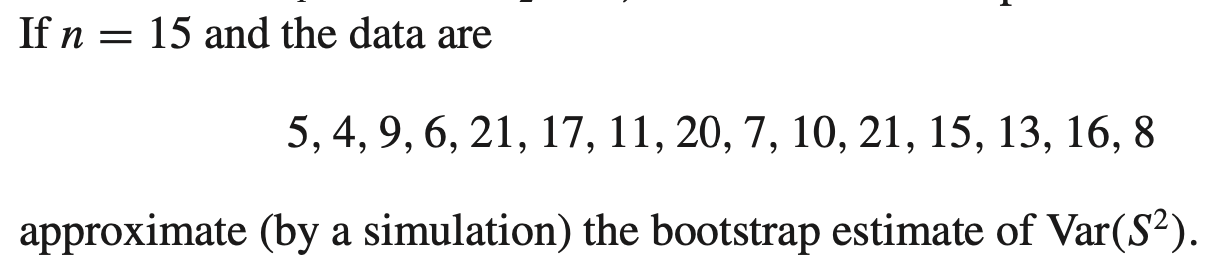

In [68]:
n = 15
data = [5, 4, 9, 6, 21, 17, 11, 20, 7, 10, 21, 15, 13, 16, 8]
r = 100

bootstrap_replicates =  bootstrap(data, estimate_param='variance')

var_S2 = bootstrap_replicates.var()
print(f"Estimate of Var(S^2) = {var_S2}")


Estimate of Var(S^2) = 54.509094518518516


## Ex03


### a)

The mean 5.4722 and median 1.9556 of the sampled pareto samples


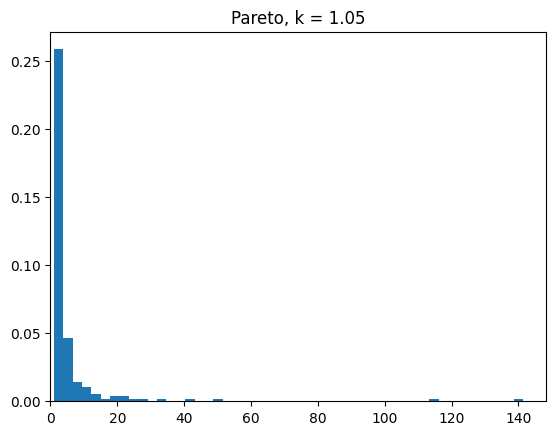

In [69]:
def pareto_samples(k, beta, num_samples: int, seed : int = 42):
    np.random.seed(seed)
    U = np.random.uniform(0.0, 1.0, num_samples)
    X = beta*(U**(-1 / k))

    return X

k = 1.05
beta = 1
N = 200
r = 100
pareto_samples = pareto_samples(k, beta, N)#*Alex, write some code here*#

pareto_samples_mean = pareto_samples.mean()
pareto_samples_median = np.median(pareto_samples)

print(f"The mean {pareto_samples_mean:.4f} and median {pareto_samples_median:.4f} of the sampled pareto samples")

plt.figure()
plt.title(f"Pareto, k = {k}")
plt.hist(pareto_samples,bins=50, density=True)
plt.xlim(left=0)
plt.show()    

### b)

In [70]:
pareto_bootstrap_means = bootstrap(pareto_samples, estimate_param='mean')
sampled_mean_var = pareto_bootstrap_means.var()

print(f"Variance of the mean of the sampled pareto samples = {sampled_mean_var:.4f}")

Variance of the mean of the sampled pareto samples = 0.9326


### c)

In [71]:
pareto_bootstrap_medians = bootstrap(pareto_samples, estimate_param='median')
sampled_median_var = pareto_bootstrap_medians.var()

print(f"Variance of the median of the sampled pareto samples = {sampled_median_var:.4f}")

Variance of the median of the sampled pareto samples = 0.0464


### Estimated parameters

In [72]:
mean_of_means = pareto_bootstrap_means.mean()
mean_of_medians = pareto_bootstrap_medians.mean()

print(f"Original mean: {pareto_samples_mean:.4f}, original median: {pareto_samples_median:.4f}")
print(f"Estimated mean: {mean_of_means:.4f}, estimated median: {mean_of_medians:.4f}")

Original mean: 5.4722, original median: 1.9556
Estimated mean: 5.3845, estimated median: 2.0372


### d)
Given the variance of the estimation of the median and the mean, it is apparent that there is a lot more variance asociated the mean rather than the median. 


The mean value is very sensitive to outliers, which the Pareto distribution is particularly proficient in producing, as such a sample mean with a large variance is to be expected.
This trait of the Pareto dsitribution is quite well known. As previously discussed in the lectures, a large amount of samples are necessary to estimate the mean of the Pareto due to nature of its moments.
The median however is less sensitive to outliers and as such a less extreme variance is to be expected.